In [258]:
"""
We all know the sad state of Canadian NHL teams. No Canadian team has won the stanley cup since Montreal in 1993.
But which team is the saddest? Using publically-available data-sets, and a totally scientific formula, I will prove
which Canadian NHL team is the saddest. Is it Toronto, who loves losing in Game 7? Or Ottawa, whose missed the 
playoffs for five years straight?

The information used herein was obtained free of charge from and is
copyrighted by the Hockey Databank project. For more information about the
Hockey Databank project please visit
http://sports.groups.yahoo.com/group/hockey-databank
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Lets read in the data
csv = '/Users/base/Desktop/Computer Science/CSV Resources/Hockey/Teams.csv'
teams = pd.read_csv(csv)

# I need to clean this up a lot. I'll start by filtering for NHL teams after 1993.
teams = teams[teams['lgID'] == 'NHL']
teams = teams[teams['year'] > 1993]

# Lets find Canadian Teams
canadian = ['VAN','CAL','EDM','WPG','TOR','OTT','MTL']
cteams = teams[teams.tmID.isin(canadian)]


# Take only the data needed for the analysis. I'll name it prexisting data.
prexisting_data = cteams[['year','name','W','L','T','OTL','Pts','GF','GA','playoff']]

# This data only goes to 2011. To get a more up-to-date calculation I'll add on more recent data.

In [259]:
path = 'https://www.hockey-reference.com/leagues/NHL_2022.html'
df = pd.read_html(path)
df[0]
# All the data is here, but it'll need some cleaning up.

,Unnamed: 0,GP,W,L,OL,PTS,PTS%,GF,GA,SRS,SOS,RPt%,RW,RgRec,RgPt%
0,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division,Atlantic Division
1,Florida Panthers*,82,58,18,6,122,.744,340,246,1.07,-0.08,.713,42,42-18-22,.646
2,Toronto Maple Leafs*,82,54,21,7,115,.701,315,253,0.69,-0.06,.646,45,45-21-16,.646
3,Tampa Bay Lightning*,82,51,23,8,110,.671,287,233,0.64,-0.02,.640,39,39-23-20,.598
4,Boston Bruins*,82,51,26,5,107,.652,255,220,0.38,-0.05,.622,40,40-26-16,.585
5,Buffalo Sabres,82,32,39,11,75,.457,232,290,-0.69,0.02,.390,25,25-39-18,.415
6,Detroit Red Wings,82,32,40,10,74,.451,230,312,-0.95,0.06,.384,21,21-40-21,.384
7,Ottawa Senators,82,33,42,7,73,.445,227,266,-0.44,0.03,.396,26,26-42-14,.402
8,Montreal Canadiens,82,22,49,11,55,.335,221,319,-1.15,0.05,.262,16,16-49-17,.299
9,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division,Metropolitan Division


In [260]:
# The data only goes to 2011, so lets get data off the Hockey Reference website then compile the dataframes.
# Years were going to add, and relevant URL.

years = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
base = 'https://www.hockey-reference.com/leagues/NHL_{}.html'

# Dataframe to to compile everything into
updated_data = pd.DataFrame()

# Start by looping over every year
for year in years:
    # Formatting the URL for the proper year
    url = base.format(year)
    
    # Take the raw data off the URL
    raw_data = pd.read_html(url)
    # Loop over every table in raw_data using indexes. Insert a new column in each called 'year' and rename another column.
    for i in range(0, 2):
        raw_data[i].insert(loc=0, column='year', value=year)
        raw_data[i].rename({'Unnamed: 0':'name'}, axis=1, inplace=True)
    
    # Concatenate the relevant tables, with data as strings. Reset the indices and take only the relevant rows and columns.
    refined_data = (pd.concat([raw_data[0].astype(str), raw_data[1].astype(str)], ignore_index = True))\
    .iloc[0:35, [0,1,3,4,5,6,8,9]]
        
    # I'll eliminate the Division Titles to clean up the data
    refined_data.replace('Atlantic Division', np.nan, inplace=True)
    refined_data.replace('Northeast Division', np.nan, inplace=True)
    refined_data.replace('Southeast Division', np.nan, inplace=True)
    refined_data.replace('Metropolitan Division', np.nan, inplace=True)
    refined_data.replace('Central Division', np.nan, inplace=True)
    refined_data.replace('Northwest Division', np.nan, inplace=True)
    refined_data.replace('Pacific Division', np.nan, inplace=True)
    
    # These division were only in place for 2021
    refined_data.replace('North Division', np.nan, inplace=True)
    refined_data.replace('East Division', np.nan, inplace=True)
    refined_data.replace('West Division', np.nan, inplace=True)
    refined_data.replace('South Division', np.nan, inplace=True)
    
    # Drop NA values, ie. those annoying division columns
    refined_data.dropna(how='any', inplace=True)
        
    # Take out the suffix.
    refined_data['name'] = refined_data['name'].str.removesuffix('*')
    
    # Let's add a playoff columns in the same format as the other dataset.
    # Our data once again is messy, but I'll loop through and compare the parts we need
    
    # Possible results for Canadian teams. No Stanley Cup championship is needed.
    playoff_results = ['F', 'CF', 'CF', 'CSF', 'CSF', 'CSF', 'CSF', 'CQF', \
                       'CQF', 'CQF', 'CQF', 'CQF', 'CQF', 'CQF', 'CQF']
    playoffs = raw_data[3:]
    
    # Create the playoff column and initialize it to 'nan'. We'll update it if the team made the playoffs,
    # and leave it as nan if they didn't.
    refined_data['playoff'] = np.nan
    index = 0
    for series in playoffs:
        # take a look at the 'refined_data' if you want a better idea of what I'm doing here.
        # TLDR: I'm just comparing scores in the table to see who lost the game.
        if series.iloc[len(series)-1, 3] > series.iloc[len(series)-1, 5]:
            loser = series.iloc[len(series)-1, 4]
        else:
            loser = series.iloc[len(series)-1, 2]
        result = playoff_results[index%15]
        index +=1
        refined_data.loc[refined_data.name == loser, 'playoff'] = result
        
    # Filter for Canadian teams
    canadian_teams = sorted(['Toronto Maple Leafs', 'Ottawa Senators','Edmonton Oilers','Vancouver Canucks','Montreal Canadiens'\
                      ,'Winnipeg Jets','Calgary Flames'])
    indices = np.where(refined_data['name'].isin(canadian_teams))
    refined_data = refined_data.iloc[indices]
    
        
    # Concatenate the refined data, with the pre-existing data to update our table
    updated_data = pd.concat([updated_data, refined_data], ignore_index=True)
updated_data

,year,name,W,L,OL,PTS,GF,GA,playoff
0,2012,Ottawa Senators,41,31,10,92,249,240,CQF
1,2012,Toronto Maple Leafs,35,37,10,80,231,264,NaN
2,2012,Montreal Canadiens,31,35,16,78,212,226,NaN
3,2012,Winnipeg Jets,37,35,10,84,225,246,NaN
4,2012,Vancouver Canucks,51,22,9,111,249,198,CQF
...,...,...,...,...,...,...,...,...,...
72,2022,Montreal Canadiens,22,49,11,55,221,319,NaN
73,2022,Winnipeg Jets,39,32,11,89,252,257,NaN
74,2022,Calgary Flames,50,21,11,111,293,208,CSF
75,2022,Edmonton Oilers,49,27,6,104,290,252,CF


In [261]:
# We'll make sure the column names are the same for concatenation
updated_data.columns= prexisting_data.columns[0:4].append(prexisting_data.columns[5:11])

# Put the datasets together in the right order.
complete_data = pd.concat([prexisting_data, updated_data], ignore_index = True)

# We have years without ties and without OTL, so we want to replace the current 'NaN' values with a zero for our calculations
complete_data.fillna(value={'T':'0','OTL':'0'}, inplace=True)

# Format those decimal columns as ints
complete_data['T'] = complete_data['T'].astype(int)
complete_data['OTL'] = complete_data['OTL'].astype(int)

print(complete_data[complete_data.name == 'Calgary Flames'])

     year            name   W   L   T  OTL  Pts   GF   GA playoff
0    1994  Calgary Flames  24  17   7    0   55  163  135     CQF
6    1995  Calgary Flames  34  37  11    0   79  241  240     CQF
12   1996  Calgary Flames  32  41   9    0   73  214  239     NaN
18   1997  Calgary Flames  26  41  15    0   67  217  252     NaN
24   1998  Calgary Flames  30  40  12    0   72  211  234     NaN
30   1999  Calgary Flames  31  36  10    5   77  211  256     NaN
36   2000  Calgary Flames  27  36  15    4   73  197  236     NaN
42   2001  Calgary Flames  32  35  12    3   79  201  220     NaN
48   2002  Calgary Flames  29  36  13    4   75  186  228     NaN
54   2003  Calgary Flames  42  30   7    3   94  200  176       F
60   2005  Calgary Flames  46  25   0   11  103  218  200     CQF
66   2006  Calgary Flames  43  29   0   10   96  258  226     CQF
72   2007  Calgary Flames  42  30   0   10   94  229  227     CQF
78   2008  Calgary Flames  46  30   0    6   98  254  248     CQF
84   2009 

In [262]:
"""
Here's our score calculation:
10% - # of wins per team
10% - # of losses per team
10% - # of GF per team
10% - # of GA per team
20% - # of playoff appearances
40% - # of rounds won in playoff appearances
"""
total_wins = {}
total_losses = {}
total_GF = {}
total_GA = {}
total_playoffs = {}
total_rounds = {}
final_score = {}

# This first loop builds the dicts, and the second one assigns the score based on the dict's orders.
for team in canadian_teams:
    total_playoffs[team] = 0
    final_score[team] = 0 
    # This section will give us nice dictionaries of the various stats for each team
    total_wins[team] = complete_data[complete_data['name'] == team]['W'].astype(int).sum()
    total_losses[team] = complete_data[complete_data['name'] == team]['L'].astype(int).sum()\
    + complete_data[complete_data['name'] == team]['OTL'].astype(int).sum()
    total_GF[team] = complete_data[complete_data['name'] == team]['GF'].astype(int).sum()
    total_GA[team] = complete_data[complete_data['name'] == team]['GA'].astype(int).sum()
    playoff_data = complete_data[complete_data.name == team]['playoff']
    for year in playoff_data:
        if year is not np.nan:
            total_playoffs[team] +=1
            
# We don't want to perform the dataframe replacement for each team (x7), so we'll break up the loop for now.
# These values represent the highest round achieved, and are only found the playoff column. I'll assign them
# values based on how many rounds they won.
complete_data.replace(np.nan, 0, inplace=True)
complete_data.replace('CQF', 0, inplace=True)
complete_data.replace('CSF', 1, inplace=True)
complete_data.replace('CF', 2, inplace=True)
complete_data.replace('F', 3, inplace=True)

for team in canadian_teams:
    # Creates the dict with every team, with 0 rounds won.
    total_rounds[team] = 0
    total_rounds[team] += complete_data[complete_data.name == team]['playoff'].astype(int).sum()
    
    
# Now we assign scores to the data. Since Winnipeg's only been in the league since the 2011-2012 season, 
# we'll adjust their score. Winnipeg played a total of 12 seasons in our dataset (11-22), all other teams 
# played 28 seasons (lockout in 2004), thus the multiplier is 28/12 = 2.333...
jets = 'Winnipeg Jets'
total_wins[jets] *= 2.333
total_losses[jets] *= 2.333
total_GF[jets] *= 2.333
total_GA[jets] *= 2.333
total_playoffs[jets] *= 2.333


# Were going to need to do a lot of sorting on these dicts, so I'll create a function to call to do it for us.
def sort_value(dictionary):
    return sorted(dictionary.items(), key = lambda i:i[1])

sort_total_wins = sort_value(total_wins)
sort_total_losses = sort_value(total_losses)
sort_total_GF = sort_value(total_GF)
sort_total_GA = sort_value(total_GA)
sort_total_playoffs = sort_value(total_playoffs)
sort_total_rounds = sort_value(total_rounds)

for index in range(0,7):
    # sort_total_wins[0] contains the team that has the least wins, and we assign it a saddeness score of ten, 
    # then find the team with the 2nd least wins, and assign it a slightly lower score, until the final score assigned is 0.
    team = sort_total_wins[index][0]
    final_score[team] += round(10-(10/6)*index,2)
    
    team = sort_total_GF[index][0]
    final_score[team] += round(10-(10/6)*index,2)
    
    # We count backwards for losses and GA by doing [6-index], because having few losses/GA is a good thing, and we 
    # want to assign the highest score to teams with a high loss/GA count.
    team = sort_total_losses[6-index][0]
    final_score[team] += round(10-(10/6)*index,2)
    
    team = sort_total_GA[6-index][0]
    final_score[team] += round(10-(10/6)*index,2)
    
    # Same formula for playoff appearances & rounds won
    team = sort_total_playoffs[index][0]
    final_score[team] += round(10-(10/6)*index,2)
    
    team = sort_total_rounds[index][0]
    final_score[team] += round(10-(10/6)*index, 2)
    
    # Nice lil rounding
    print(team, final_score[team], round(final_score[team], 2))
    final_score[team] = round(final_score[team], 2)
print(final_score)
    




Calgary Flames 20.0 20.0
Winnipeg Jets 8.33 8.33
Toronto Maple Leafs 23.340000000000003 23.34
Edmonton Oilers 48.33 48.33
Montreal Canadiens 34.989999999999995 34.99
Vancouver Canucks 15.0 15.0
Ottawa Senators 21.68 21.68
{'Calgary Flames': 41.67, 'Edmonton Oilers': 48.33, 'Montreal Canadiens': 34.99, 'Ottawa Senators': 21.68, 'Toronto Maple Leafs': 28.340000000000003, 'Vancouver Canucks': 15.0, 'Winnipeg Jets': 19.990000000000002}


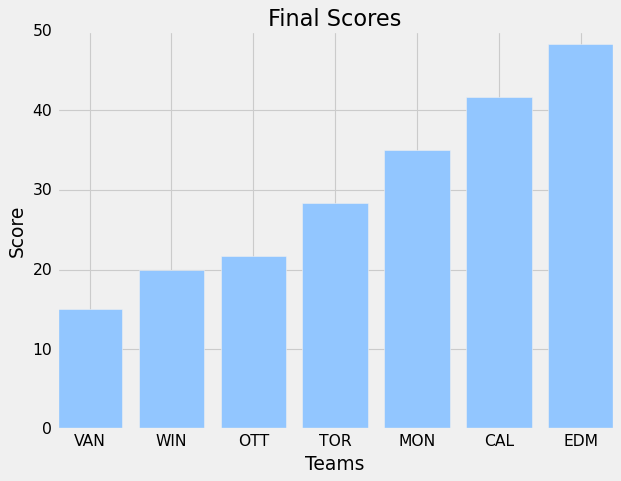

In [263]:
sort_final_score = sort_value(final_score)
names = []
values = []
for item in sort_final_score:
    names.append(item[0][0:3].upper())
    values.append(item[1])
plt.style.use('seaborn-pastel')
plt.title('Final Scores')
plt.xlabel('Teams')
plt.ylabel('Score')
plt.bar(names, values)
plt.show()

In [ ]:
# Just like that, it is proven, beyond a shadow of a doubt, that the Edmonton Oilers are the saddest Canadian NHL team.
